### Import Libraries

In [1]:
import cv2
import numpy
from matplotlib import pyplot as plt

### Read Image File

In [2]:
img = cv2.imread("IMG_2315.jpg")     

### Show Image

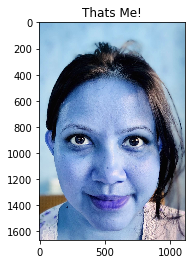

In [3]:
plt.imshow(img)
plt.title('Thats Me!')
plt.show()

### Convert to Gray

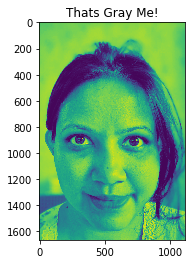

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
### Write the grayed image 
cv2.imwrite('outputs/gray_img_2315.jpg', gray_img) 
# Plot the image here
plt.imshow(gray_img)
plt.title('Thats Gray Me!')
plt.show()

### Track The Face

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)
faces

array([[ 98, 603, 881, 881]], dtype=int32)

### Draw a Rectangle on the face

In [6]:
font = cv2.FONT_HERSHEY_SIMPLEX
for (x,y,w,h) in faces:
    rect_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0, 255, 0),2)
    roi_color = img[y:y+h, x:x+w] 
    cv2.putText(rect_img,'Face',(x, y), font, 2,(255,0,0),5)

In [7]:
cv2.imwrite('outputs/Mod_IMG_2315_1.jpg', rect_img) 
cv2.imwrite('outputs/Mod_IMG_2315_2.jpg', roi_color) 
#cv2.imwrite('outputs/Mod_IMG_2315_3.jpg', roi_gray) 

True

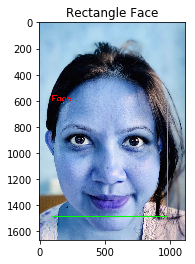

In [8]:
plt.imshow(rect_img)
plt.title('Rectangle Face')
plt.show()

### Track The Eyes

In [9]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(roi_color,1.2,18)
# Loop 
for (ex,ey,ew,eh) in eyes:
        mod_img = cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        mod_img = cv2.putText(roi_color,'Eyes',(ex,ey), font, 1, (0, 255, 0), 1)
# Write the image
cv2.imwrite('outputs/Mod_IMG_2315_3.jpg', mod_img) 

True

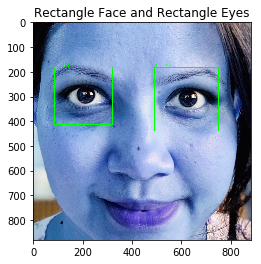

In [10]:
plt.imshow(mod_img)
plt.title('Rectangle Face and Rectangle Eyes')
plt.show()

### Detect a Smile

In [11]:
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smile = smile_cascade.detectMultiScale(roi_color,1.7,20)
# Loop 
for (sx, sy, sw, sh) in smile:
    mod_img = cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 255, 0), 2)
    mod_img = cv2.putText(roi_color,'Smile',(sx,sy), font, 1, (0, 255, 0), 1)

        
# Write the image
cv2.imwrite('outputs/Mod_IMG_2315_4.jpg', mod_img) 

True

### Function -1

In [12]:
def detect_face_eyes(img, mod_name):
    import numpy as np
    import cv2

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') 

    img = cv2.imread(img) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE) 

    for (x,y,w,h) in faces: 
        new_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) 
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = new_img[y:y+h, x:x+w] 
        
        eyes = eye_cascade.detectMultiScale(roi_color) 
        for (ex,ey,ew,eh) in eyes: 
            final_img=cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) 

    cv2.imwrite('outputs/'+mod_name, final_img)


In [13]:
detect_face_eyes("IMG_2315.jpg","New_IMG_2315.jpg")

### Modified Function

In [14]:
def detect_face_eyes_smile(img, mod_name):
    import numpy as np
    import cv2

    font = cv2.FONT_HERSHEY_SIMPLEX
    face_counter = 0
    eyes_counter = 0
    smile_counter = 0
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

    img = cv2.imread(img) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        

    for (x,y,w,h) in faces:
        face_counter += 1
        # Draw rectangle around the face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,130,0),2)
        cv2.putText(img,'Face',(x, y), font, 2,(255,0,0),5)
        
        #Detect Eyes    
        eyes = eye_cascade.detectMultiScale(img,1.2, 18)
        for (ex,ey,ew,eh) in eyes:
            eyes_counter += 1
            img=cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,180,60),2)
            img = cv2.putText(img,'Eyes',(x + ex,y + ey), font, 1, (0, 180, 60), 2)
        
        #Detect Smile
        smile = smile_cascade.detectMultiScale(img,1.8, 20)
        #Loop 
        for (sx, sy, sw, sh) in smile:
            smile_counter += 1
            img = cv2.rectangle(img, (sx, sy), (sx+sw, sy+sh), (255, 0, 130), 2)
            img = cv2.putText(img,'Smile',(x + sx,y + sy), font, 1, (255, 0, 130), 1)


    print("Faces Found in the given image : ",face_counter) 
    print("Eyes Found in the given image : ",eyes_counter)    
    print("Smile Found in the given image : ",smile_counter)  
    cv2.imwrite('outputs/'+mod_name, img) 

In [15]:
detect_face_eyes_smile("IMG_2315.jpg","Mod_IMG_2315.jpg")

Faces Found in the given image :  1
Eyes Found in the given image :  2
Smile Found in the given image :  3


In [16]:
detect_face_eyes_smile("IMG_5350.jpg","Mod_IMG_5350.jpg")

Faces Found in the given image :  2
Eyes Found in the given image :  6
Smile Found in the given image :  40


In [17]:
detect_face_eyes_smile("IMG_4707.jpg","Mod_IMG_4707.jpg")

Faces Found in the given image :  1
Eyes Found in the given image :  1
Smile Found in the given image :  28


In [18]:
detect_face_eyes_smile("IMG_5798.jpg","Mod_IMG_5798.jpg")

Faces Found in the given image :  0
Eyes Found in the given image :  0
Smile Found in the given image :  0
